In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'F'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,8.67,8.48,8.67,8.51,54539700.0,7.844517
2019-03-21,8.69,8.49,8.50,8.69,46843100.0,8.010442
2019-03-22,8.67,8.52,8.63,8.54,41964000.0,7.872172
2019-03-25,8.65,8.47,8.56,8.51,45849500.0,7.844517
2019-03-26,8.76,8.54,8.54,8.76,47852100.0,8.074968


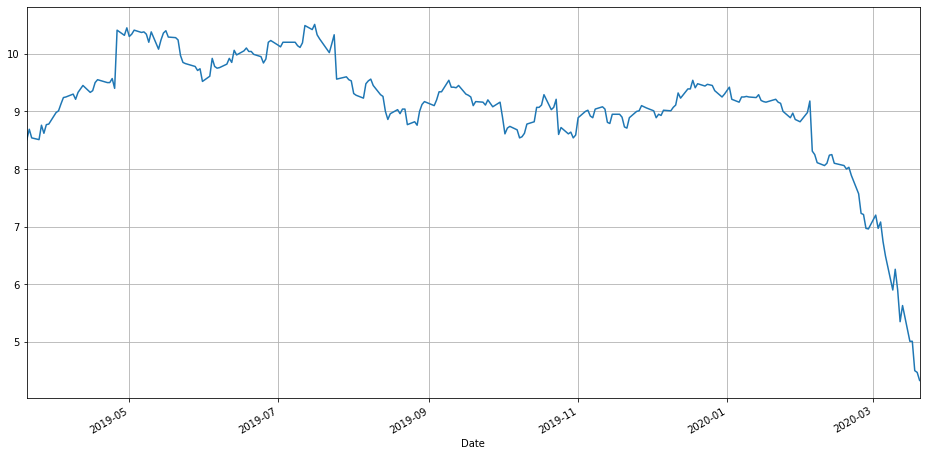

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

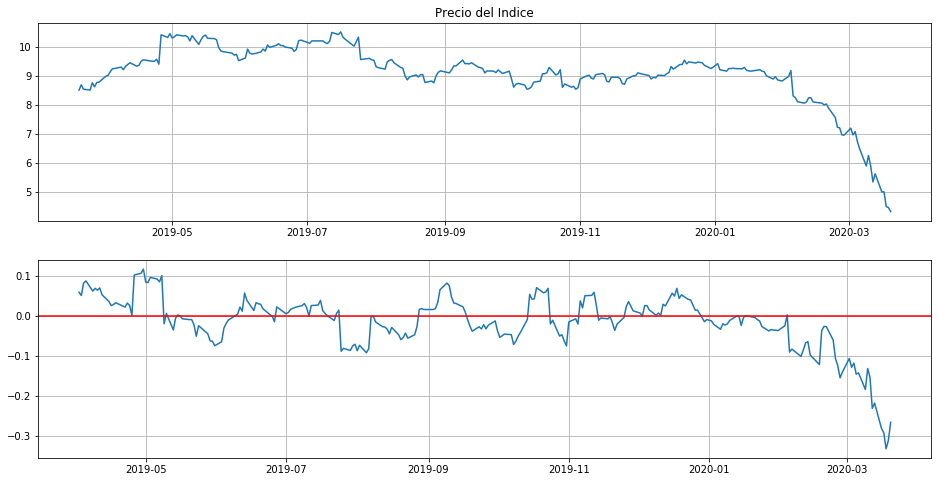

,Close,ROC_10,Recomendación
Date,,,
2019-05-09,10.20,-0.020173,Se recomienda VENDER la acción.
2019-05-10,10.38,0.005814,Se recomienda COMPRAR la acción.
2019-05-13,10.08,-0.035407,Se recomienda VENDER la acción.
2019-05-15,10.36,0.001934,Se recomienda COMPRAR la acción.
2019-05-16,10.40,-0.000961,Se recomienda VENDER la acción. (DIV)
2019-06-10,9.82,0.004090,Se recomienda COMPRAR la acción.
2019-06-25,9.84,-0.001015,Se recomienda VENDER la acción.
2019-06-27,10.20,0.022044,Se recomienda COMPRAR la acción.
2019-07-11,10.19,-0.000980,Se recomienda VENDER la acción. (DIV)


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]